In [172]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pickle
import random
from tqdm import tqdm
import numpy as np
import statsmodels.api as sm

from sklearn.manifold import MDS
from mpl_toolkits import mplot3d
from scipy.spatial import distance
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering, SpectralClustering, KMeans, AffinityPropagation, DBSCAN, FeatureAgglomeration
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from IPython.display import clear_output, Image, display
from sklearn.datasets.samples_generator import make_blobs
import itertools
from scipy.spatial.distance import cdist
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D
from utils import *
from kmedoids import *
from sklearn.metrics.pairwise import pairwise_distances
plt.ion()
plt.show()

## The goal of this notebook is to provide demos and overviews of the most popular clustering algorithms implemented in python

These algorithms will be run on the same generated dataset:

## Generate data corresponding to 7 clusters

Calculate distance matrix (D) based on the euclidean pairwise distance between points:

(300, 2)


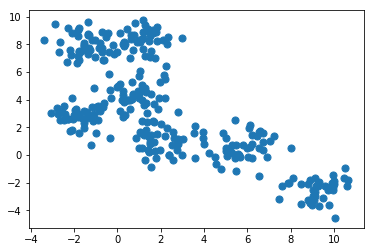

In [2]:
X, y_true = make_blobs(n_samples=300, centers=7,
                       cluster_std=.80, random_state=0)
/print X.shape
plt.scatter(X[:, 0], X[:, 1], s=50);

Create distance matrix

In [3]:
D = pairwise_distances(X, metric='euclidean')
D.shape

(300, 300)

# Paritioning methods

### K-means

- Each cluster is represented by the center of the cluster (centroid)
- Often terminates at a local optimal
- Need to specify the number of clusters 
- Sensitive to noisy data and outliers (solution: k-medians and k-medoids)
- Applicable only to continuous space (k-modes for categorical data)
- Cannot detect clusters of non-convex (circular) shapes (solution: density based clustering, kernel k-means)
- Initialisation conditions can have an effect on clustering performance: K-means ++ maximizes the distance between chosen cluster centers


https://www.youtube.com/watch?v=4b5d3muPQmA&feature=youtu.be&t=34


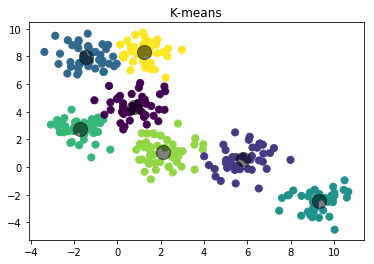

In [13]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.title('K-means')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### K-medoids
- Solves the sensitiveness to outliers problem that K-Means has (very large values can distort the distribution of data)
- Uses the most centrally located object in the cluster instead of the mean value (medoid = representative cluster object)
- PAM (Partitioning around medoids, 1987): replaces one medoid by a non-medoid if it improves the total sum of squared errors; computationally expensive
- CLARA: PAM on samples and CLARANS : randomized sampling
- Uses distance matrix


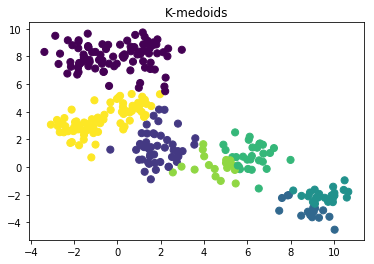

In [21]:
M, clusters = kMedoids(D,7)
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
plt.title('K-medoids');

# Hierarchical clustering methods

- Start either from single point clusters and merge them based on similarity (agglomerative clustering : bottom-up clustering) or start from the whole macro cluster and separate it into subclusters (divisive clustering: top-down clustering)
- No need to specify the number of clusters
- Generates a hierarchical cluster representation = dendogram

https://www.youtube.com/watch?v=XJ3194AmH40&feature=youtu.be&t=319
https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

## Agglomerative clustering
- Continuously merge nodes that have the least dissimilarity
- Capable of clustering non-elliptical groups
- Sensitive to noise and outliers


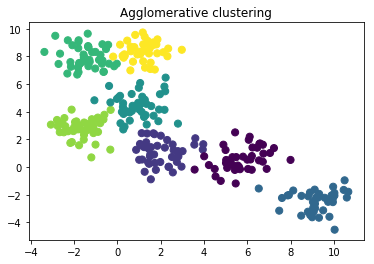

In [32]:
clusters = AgglomerativeClustering(n_clusters= 7, linkage = "ward").fit(X)
clusters = clusters.labels_

plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
plt.title('Agglomerative clustering');

## CURE

https://github.com/annoviko/pyclustering

In [33]:
!pip3 install pyclustering

  Running setup.py bdist_wheel for pyclustering: started
  Running setup.py bdist_wheel for pyclustering: finished with status 'done'
  Stored in directory: C:\Users\ciort\AppData\Local\pip\Cache\wheels\e7\e9\4a\a0c760592ec6b9249f6754c6d2da753d9442bd8e10b50cd959
Successfully built pyclustering


You are using pip version 9.0.3, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
from pyclustering.cluster import cluster_visualizer;
from pyclustering.cluster.cure import cure;
from pyclustering.utils import read_sample;
from pyclustering.samples.definitions import FCPS_SAMPLES;

In [14]:
# Allocate clusters:
cure_instance = cure(X, 7);
cure_instance.process();
result = cure_instance.get_clusters();

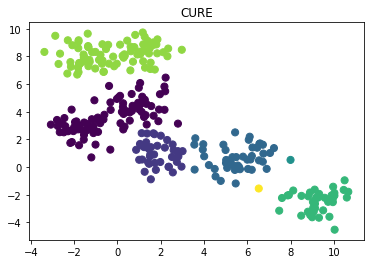

In [21]:
clusters = np.zeros(len(X))
for i in range(len(result)):
    clusters[result[i]] = i
    
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
plt.title('CURE');

### BIRCH

In [153]:
from sklearn import cluster, datasets, mixture

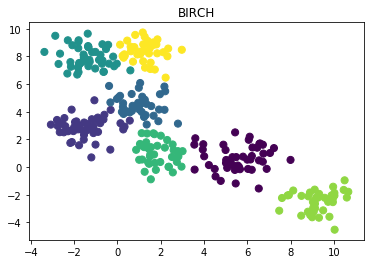

In [156]:
birch = cluster.Birch(n_clusters=7).fit(X)
clusters = birch.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
plt.title('BIRCH');

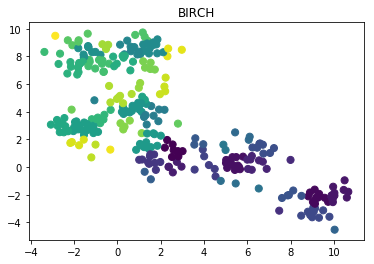

In [161]:
birch = cluster.Birch(branching_factor=50, n_clusters=None, threshold=0.55, compute_labels=True).fit(X)
clusters = birch.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
plt.title('BIRCH');

## Density based clustering

### DBSCAN

https://www.youtube.com/watch?v=sJQHz97sCZ0&feature=youtu.be&t=12 

There are 2 python implemteations of DBSCAN in 
- sklearn and 
- pyclustering

For comparative purposes, the cell below runs these 2 implementations in parallel:

In [136]:
from pyclustering.cluster.dbscan import dbscan;

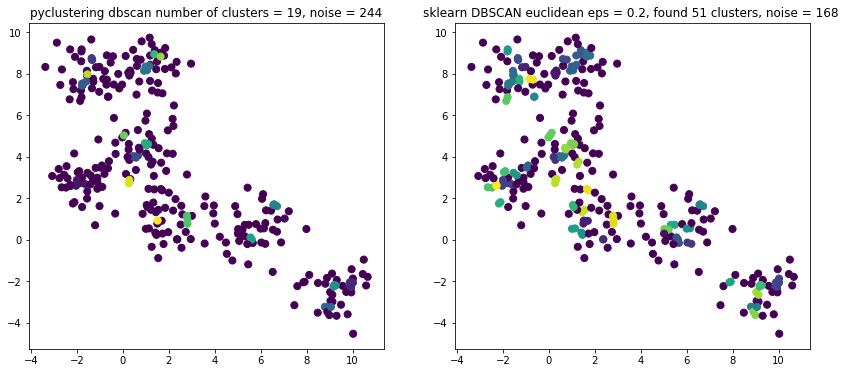

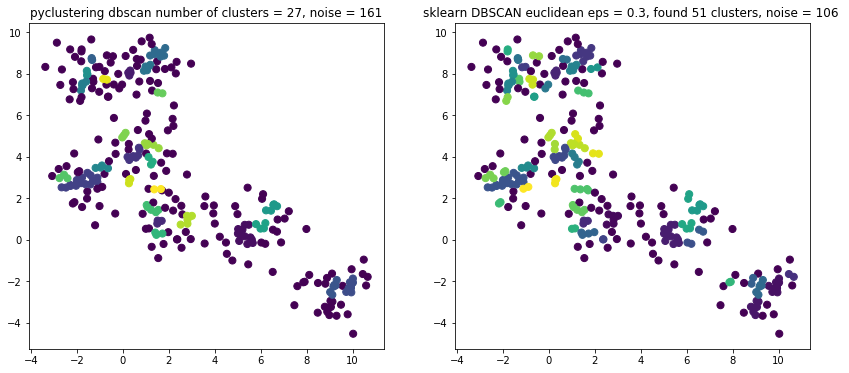

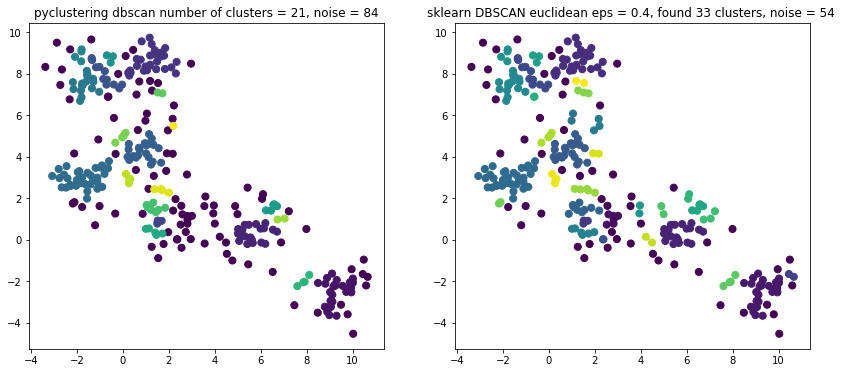

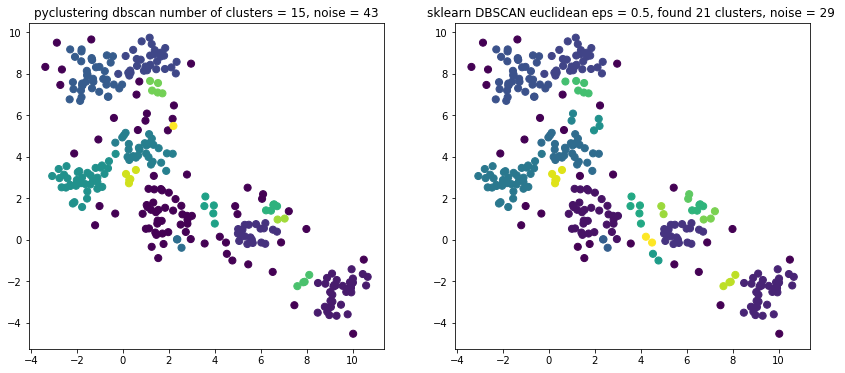

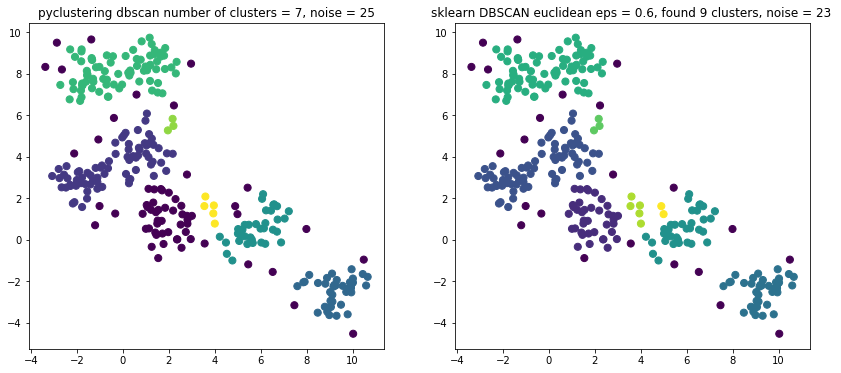

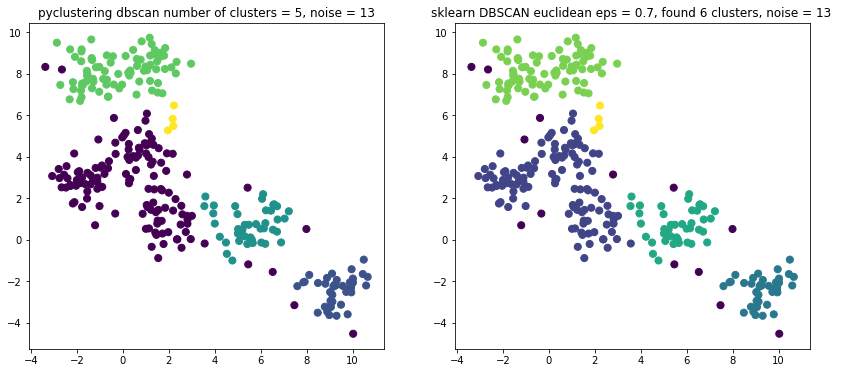

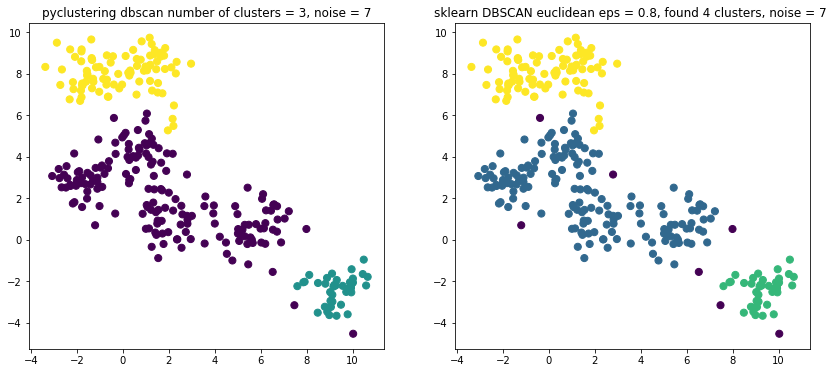

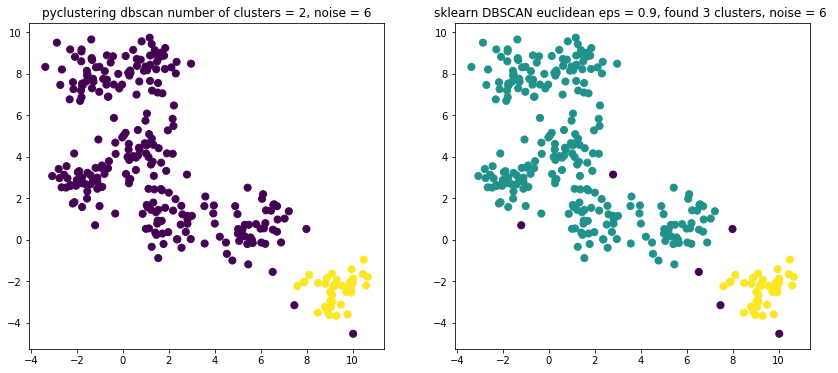

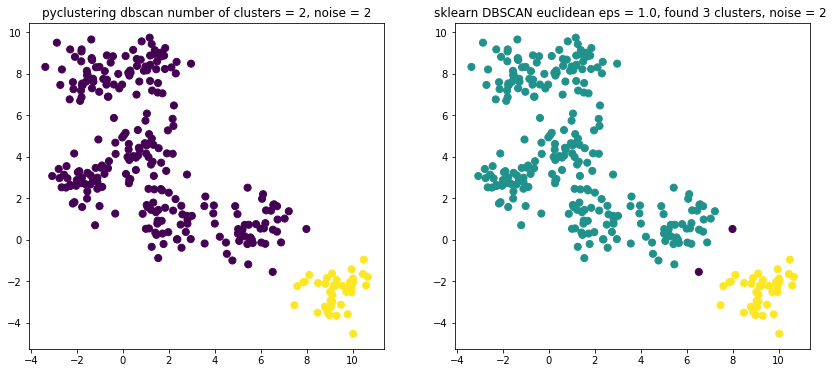

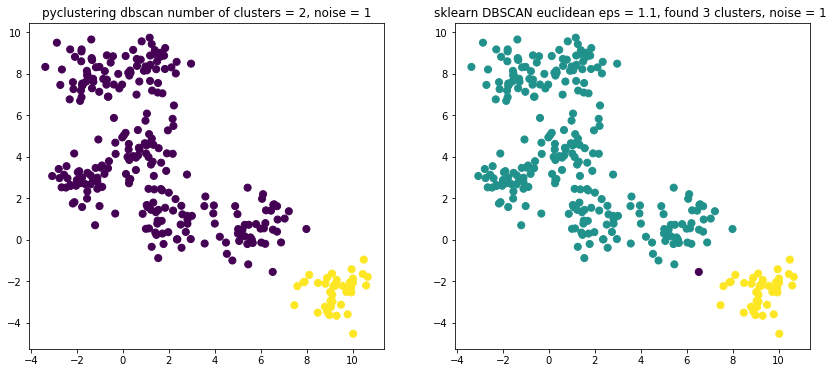

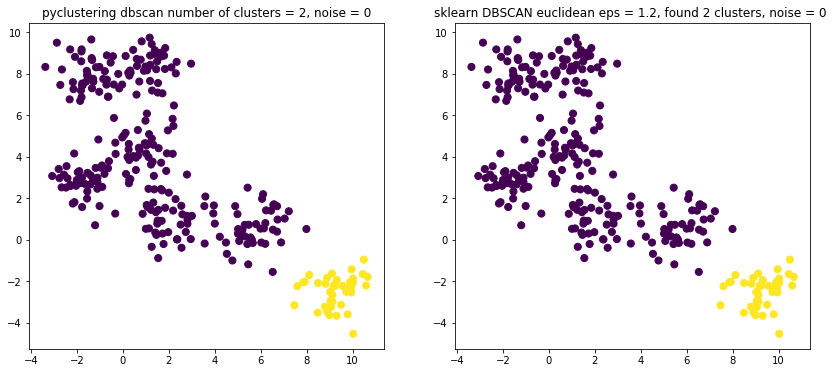

In [145]:
for eps in range(2, 13):
    eps = eps/10
    minPoints = 2
    
    plt.figure(figsize = (14, 6))
    plt.subplot(121)
    dbscan_instance = dbscan(X, eps, minPoints)
    dbscan_instance.process();
    result = dbscan_instance.get_clusters();
    noise = dbscan_instance.get_noise();
    clusters = np.zeros(len(X))
    for i in range(len(result)):
        clusters[result[i]] = i
    plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
    plt.title('pyclustering dbscan number of clusters = %s, noise = %s'% ( len(Counter(clusters).keys()), len(noise)));
    

    plt.subplot(122)
    clusters = DBSCAN(eps=eps, min_samples=minPoints, metric="euclidean").fit(X)
    clusters = clusters.labels_
    noise = np.where(clusters ==-1)[0]
    plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
    plt.title('sklearn DBSCAN euclidean eps = %s, found %s clusters, noise = %s ' % (eps, len(Counter(clusters).keys()), len(noise)));

DBSCAN can work with coordinates or with distances. The cell below compares the 2 approaches, the left plot depicts the results using the distance matrix while the left plot shows the results using coordinates and euclidean distance.


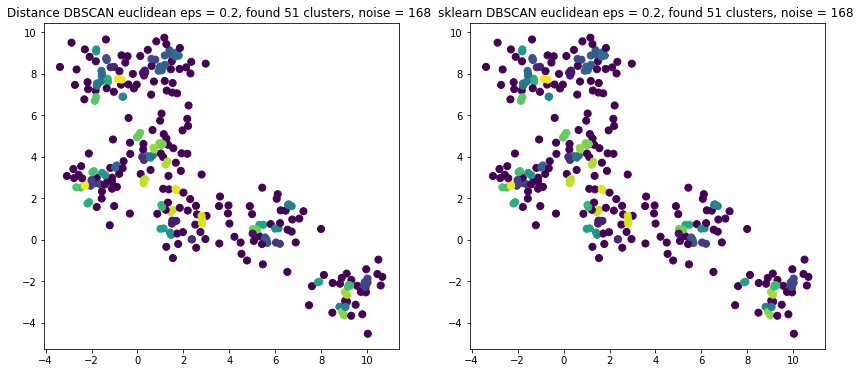

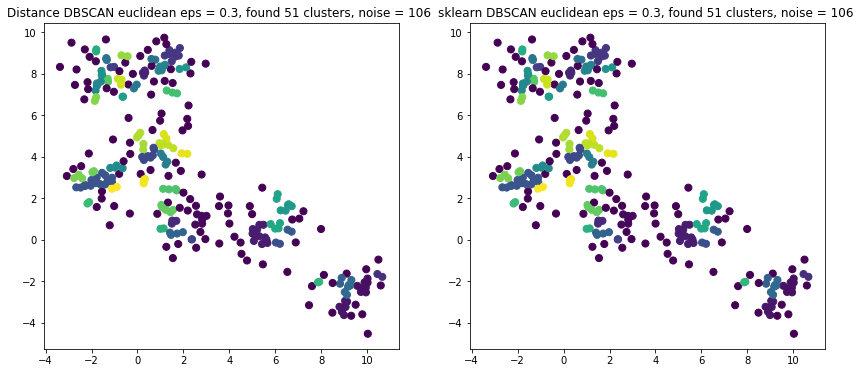

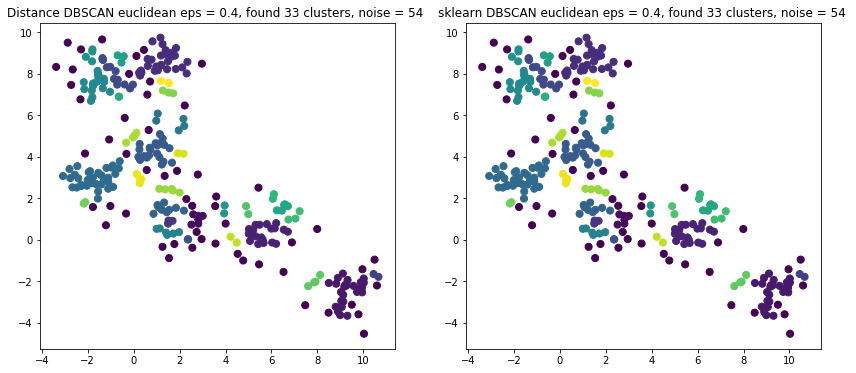

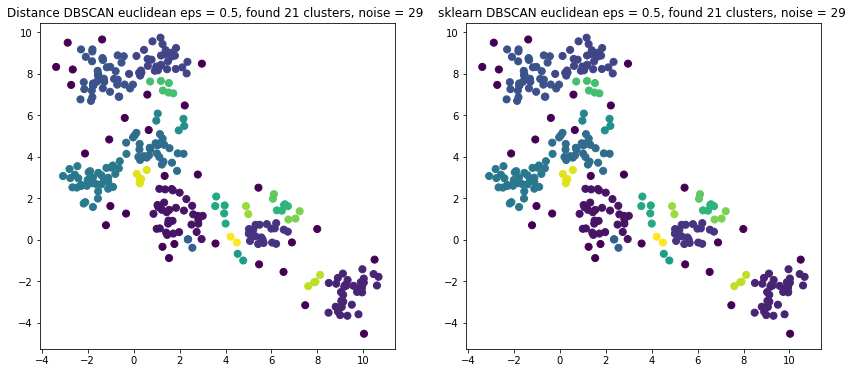

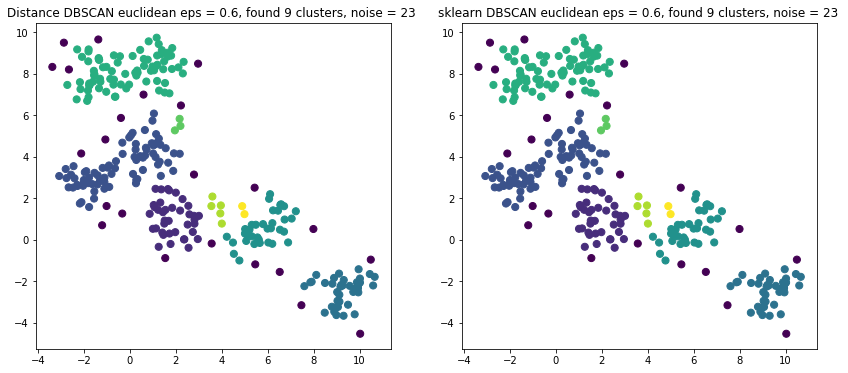

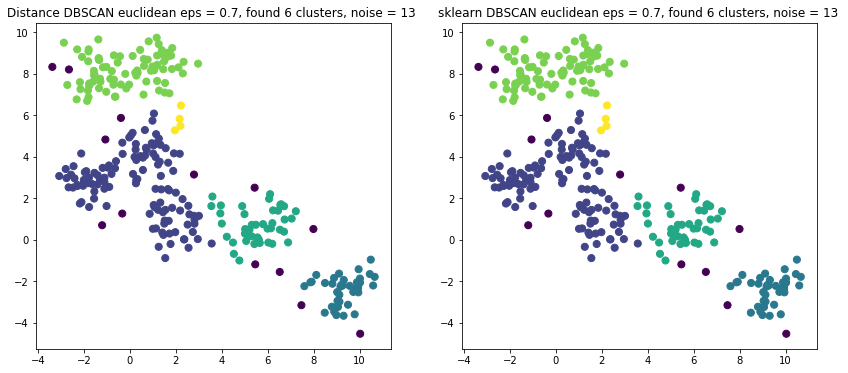

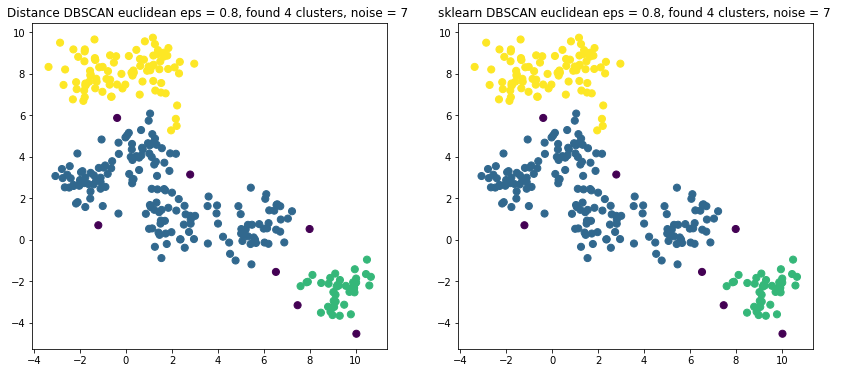

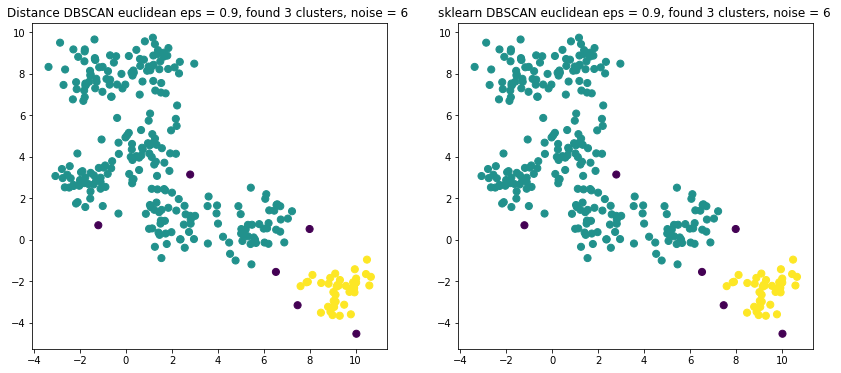

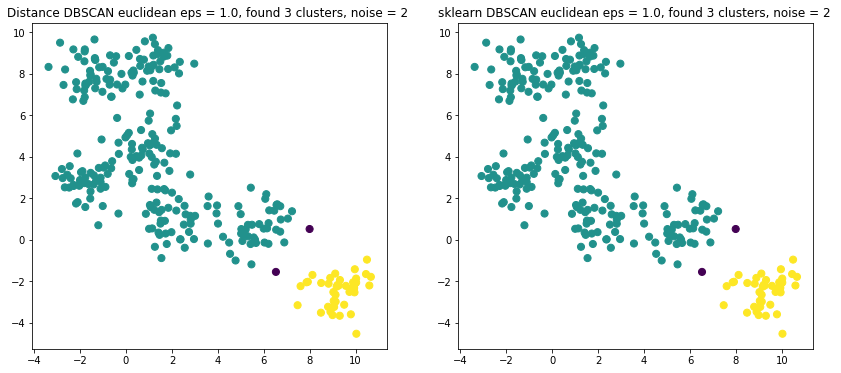

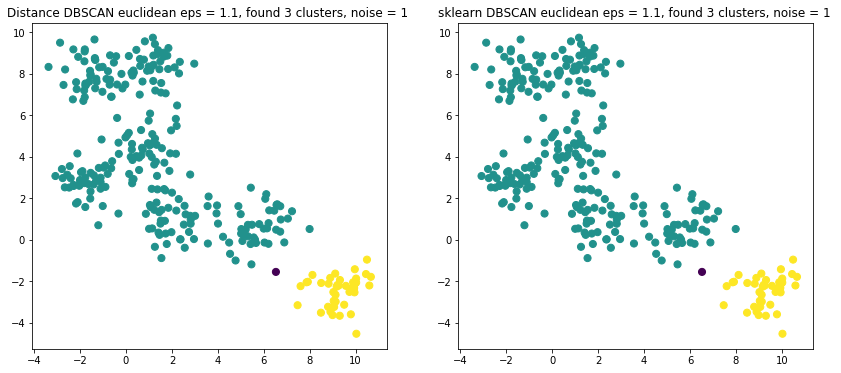

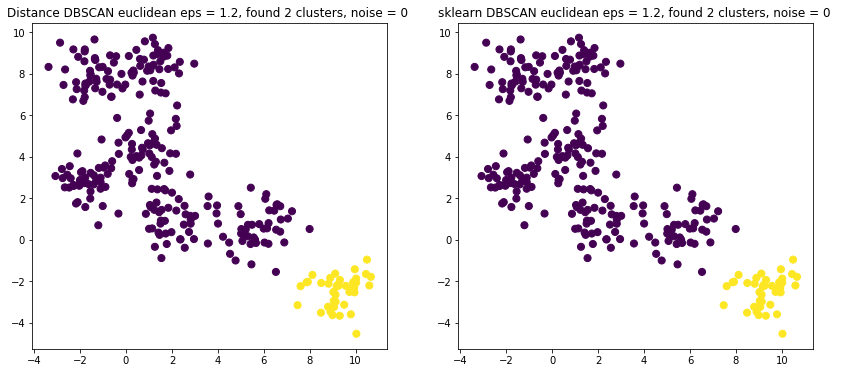

In [147]:
for eps in range(2, 13):
    eps = eps/10
    minPoints = 2
    
    plt.figure(figsize = (14, 6))
    plt.subplot(121)
    clusters = DBSCAN(eps=eps, min_samples=minPoints, metric="precomputed").fit(D)
    clusters = clusters.labels_
    noise = np.where(clusters ==-1)[0]
    plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
    plt.title('Distance DBSCAN euclidean eps = %s, found %s clusters, noise = %s ' % (eps, len(Counter(clusters).keys()), len(noise)));
    
    plt.subplot(122)
    clusters = DBSCAN(eps=eps, min_samples=minPoints, metric="euclidean").fit(X)
    clusters = clusters.labels_
    noise = np.where(clusters ==-1)[0]
    plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
    plt.title('sklearn DBSCAN euclidean eps = %s, found %s clusters, noise = %s ' % (eps, len(Counter(clusters).keys()), len(noise)));

### HDBSCAN

In [108]:
# ! conda install -c conda-forge hdbscan

In [109]:
import hdbscan

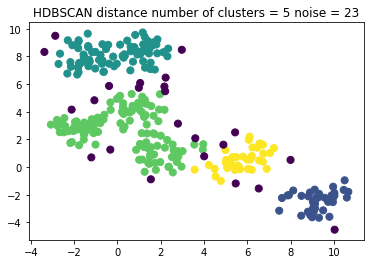

In [146]:
clusterer = hdbscan.HDBSCAN(metric='precomputed')
clusterer.fit(D)
clusters = clusterer.labels_
noise = np.where(clusters ==-1)[0] 
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
plt.title('HDBSCAN distance number of clusters = %s noise = %s' % ( len(Counter(clusters).keys()), len(noise)) );

### OPTICS
https://github.com/annoviko/pyclustering

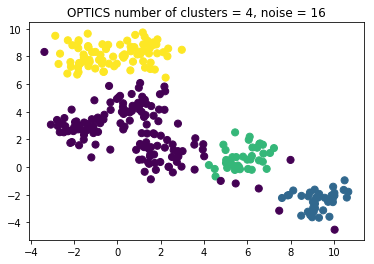

In [135]:
from pyclustering.cluster.optics import optics, ordering_analyser, ordering_visualizer;
eps = 0.8
minpts = 4
optics_instance = optics(X, eps, minpts)
optics_instance.process();
result = optics_instance.get_clusters();
noise = optics_instance.get_noise();
clusters = np.zeros(len(X))
for i in range(len(result)):
    clusters[result[i]] = i
    
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
plt.title('OPTICS number of clusters = %s, noise = %s'% ( len(Counter(clusters).keys()), len(noise)));

### Canopy clustering

In [44]:
from sklearn.preprocessing import normalize
N = normalize(X)
N.shape

(300, 2)

In [73]:
from sklearn.metrics.pairwise import paired_distances
def canopy(X, T1, T2, distanceMatrix = False, distance_metric='euclidean', filemap=None):
    canopies = dict()
    clusters = np.zeros(X.shape[0])
    if distanceMatrix == False:
        X1_dist = pairwise_distances(X, metric=distance_metric)
    else:
        X1_dist = X
    canopy_points = set(range(X.shape[0]))
    while canopy_points:
        point = canopy_points.pop()
        i = len(canopies)
        canopies[i] = {"c":point, "points": list(np.where(X1_dist[point] < T2)[0])}
        clusters[canopies[i]["c"]] = i
        clusters[canopies[i]["points"]] = i
        canopy_points = canopy_points.difference(set(np.where(X1_dist[point] < T1)[0]))
    return canopies, clusters

canopies, clusters = canopy(N, 0.25, 0.4)

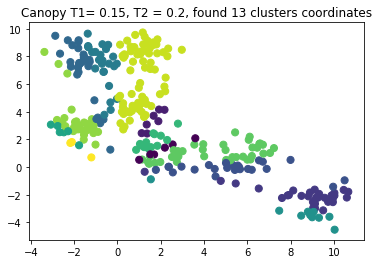

In [70]:
# for eps in range(2, 13):
T1 = 0.15
T2 = 0.2
canopies, clusters = canopy(N, T1, T2)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
plt.title('Canopy T1= %s, T2 = %s, found %s clusters coordinates' % (T1, T2, len(Counter(clusters).keys())));

(array([ 9243., 11349., 15277., 14614., 13037., 12530.,  5860.,  3720.,
         4116.,   254.]),
 array([0.        , 0.01322575, 0.02645149, 0.03967724, 0.05290299,
        0.06612873, 0.07935448, 0.09258023, 0.10580598, 0.11903172,
        0.13225747]),
 <a list of 10 Patch objects>)

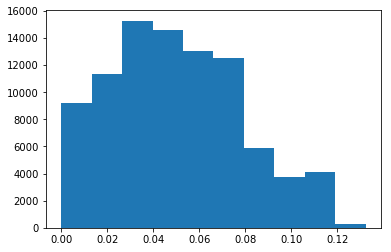

In [84]:
plt.hist(np.ravel(normalize(D)))

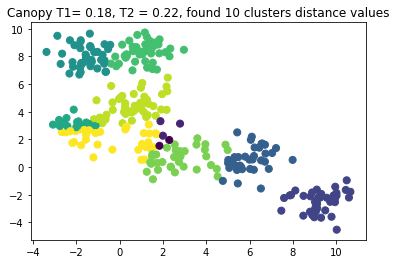

In [104]:
T1 = 0.18
T2 = 0.22
canopies, clusters = canopy(normalize(D), T1, T2)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
plt.title('Canopy T1= %s, T2 = %s, found %s clusters distance values' % (T1, T2, len(Counter(clusters).keys())));

## GaussianMixtureModel

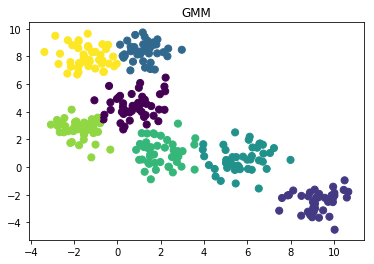

In [163]:
model = mixture.GaussianMixture(7, covariance_type ='full', random_state = 0).fit(X)
clusters = model.predict(X)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
plt.title('GMM');

## Bayesian Gaussian Mixture

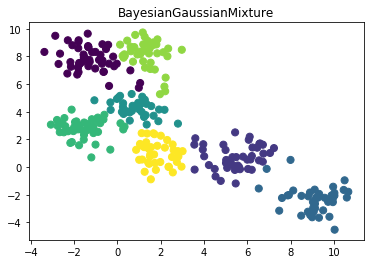

In [165]:
model = mixture.BayesianGaussianMixture(n_components=8, covariance_type='full').fit(X)
clusters = model.predict(X)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
plt.title('BayesianGaussianMixture');

### Mean Shift

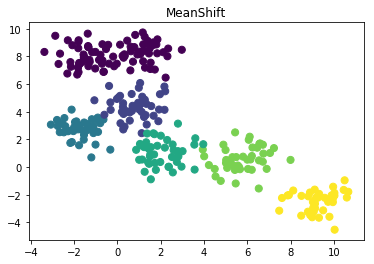

In [171]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X, quantile=0.13, n_samples=len(X))

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
clusters = ms.labels_

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
plt.title('MeanShift');

### Linkage

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


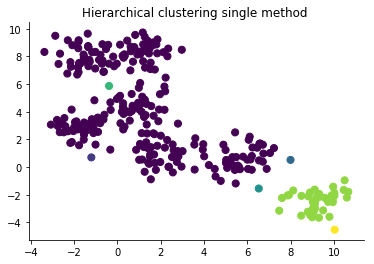

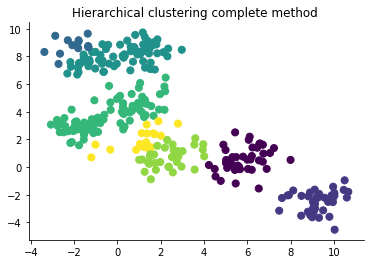

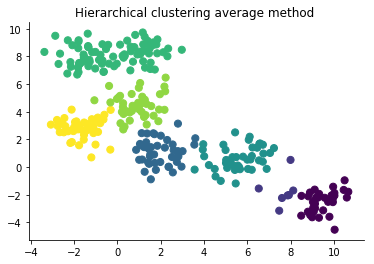

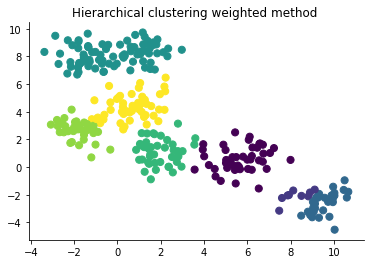

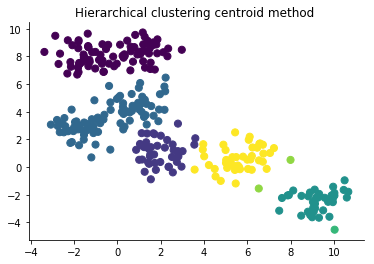

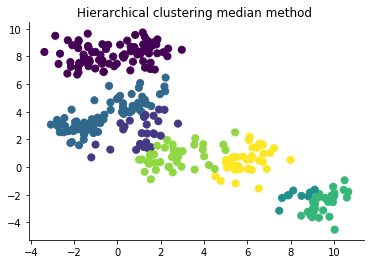

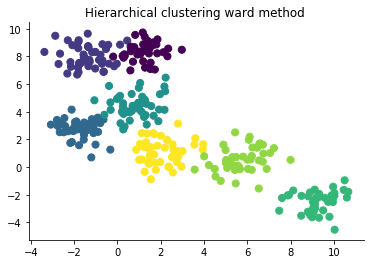

In [29]:
for method in ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward' ]:
    Z = linkage(D, method, 'euclidean')
    k=7
    c = fcluster(Z, k, criterion='maxclust')

    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=c, s=50, cmap='viridis')
    sns.despine()
    plt.title('Hierarchical clustering %s method ' % method);

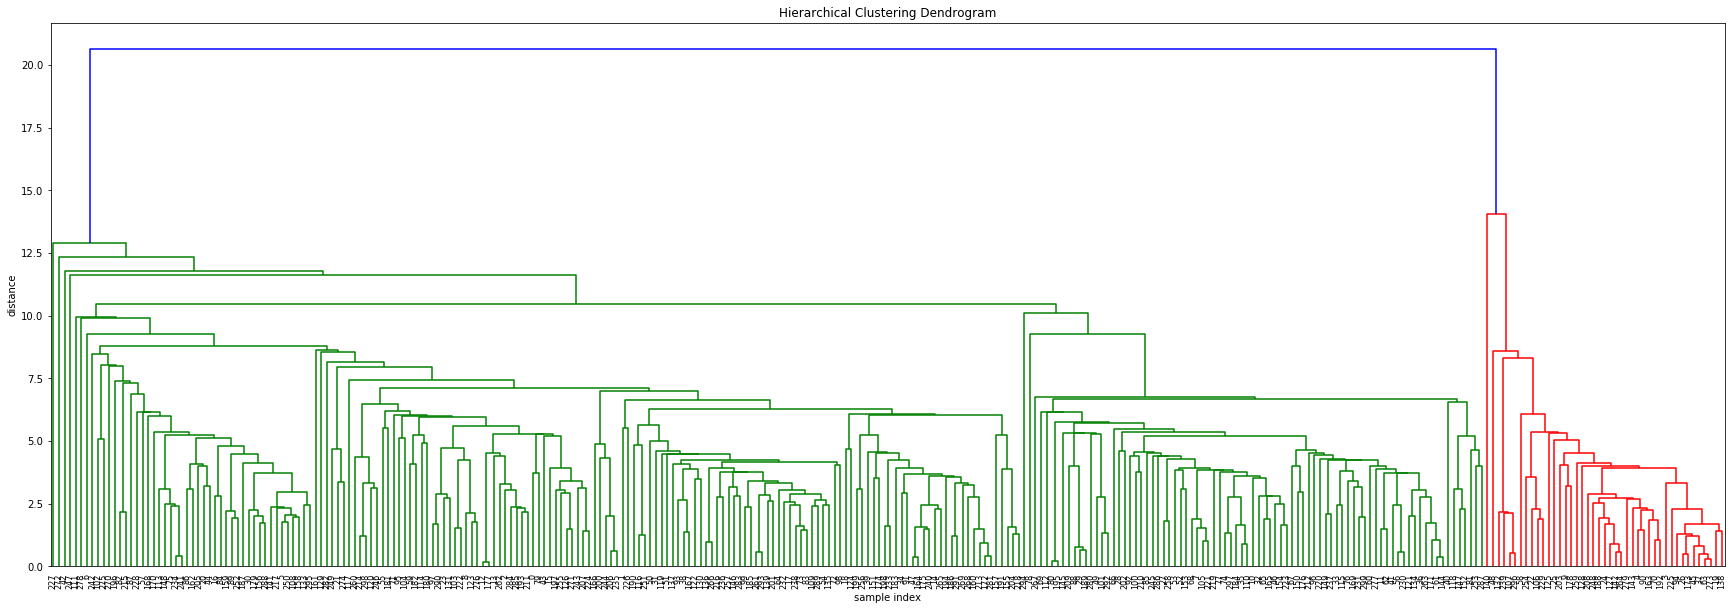

In [27]:
# calculate full dendrogram
plt.figure(figsize=(30, 10))
plt.title('Hierarchical Clustering Dendrogram' )
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

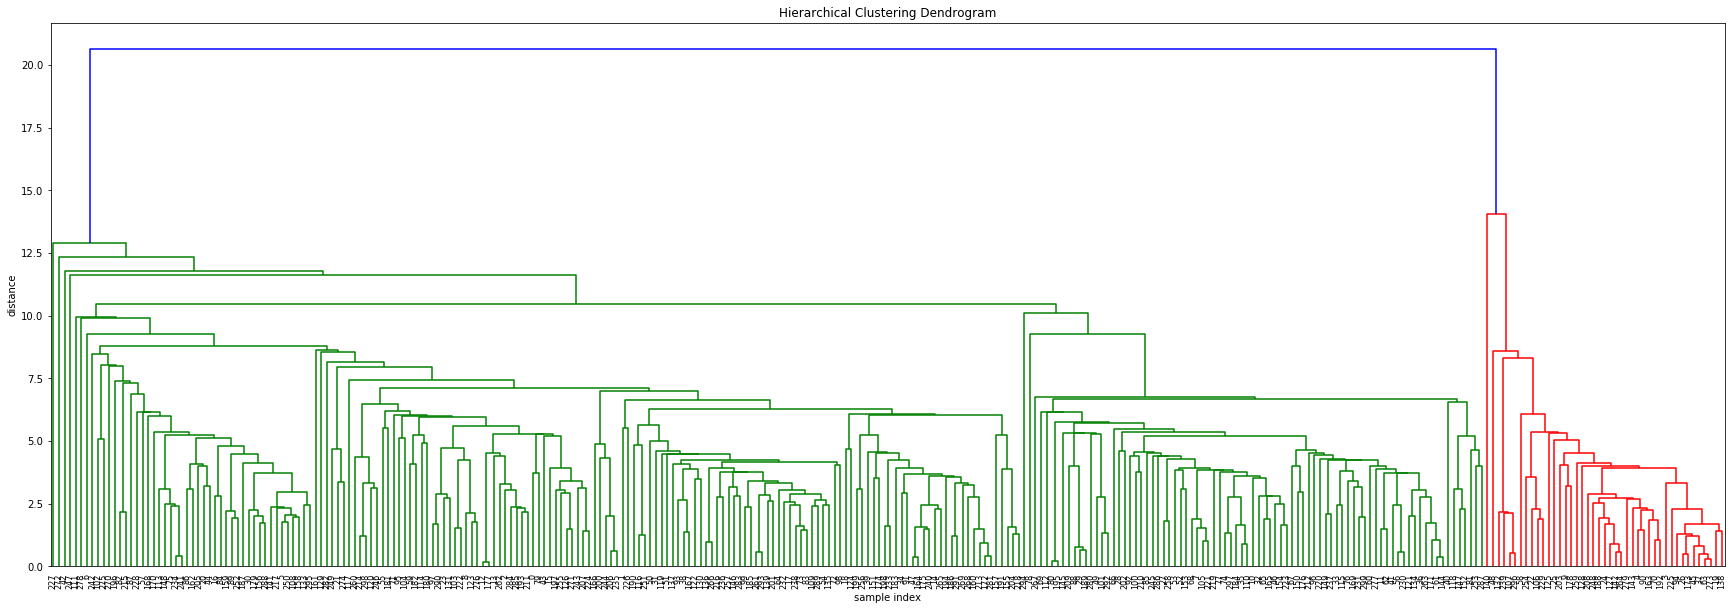

# Find optimal number of clusters

This section will provide implementations for 3 methods:
- Elbow method (checks cluster variance)
- Silhouette method (cluster compactness, intercluster distance)
- AIC/BIC scores


## Elbow method

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 22.49it/s]


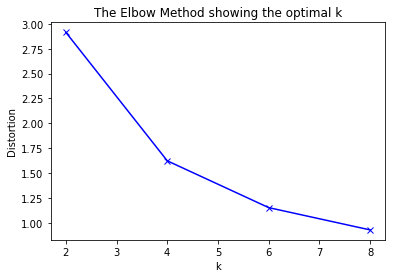

In [4]:
elbowAnalysis(X, range(2, 10, 2))

## Silhouette method

- The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
- The silhouette ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
- If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.
- The silhouette can be calculated with any distance metric, such as the Euclidean distance or the Manhattan distance.

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 16.63it/s]


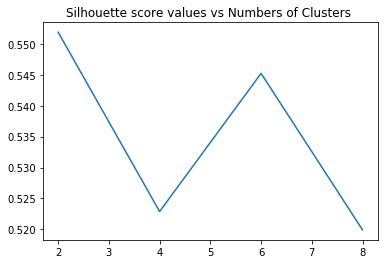

Optimal number of components is: 2


In [5]:

silhouetteAnalyis(X, range(2, 10, 2))

## BIC, AIC for GMM

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  7.88it/s]


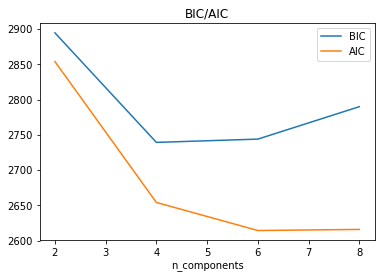

In [6]:
bicAicAnalysis(X, range(2, 10, 2))

In [18]:
clusterEvalData = evaluateClusters(X, y_kmeans)

100%|██████████| 6/6 [00:00<00:00, 23.69it/s]


Kmeans  : Inter cluster measures :  {'silhouetteScore': 0.54524415220215072, 'daviesBouldin': 0.10886778290265314}


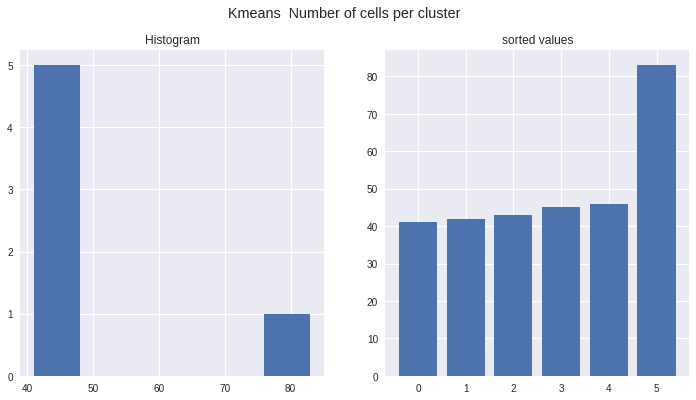

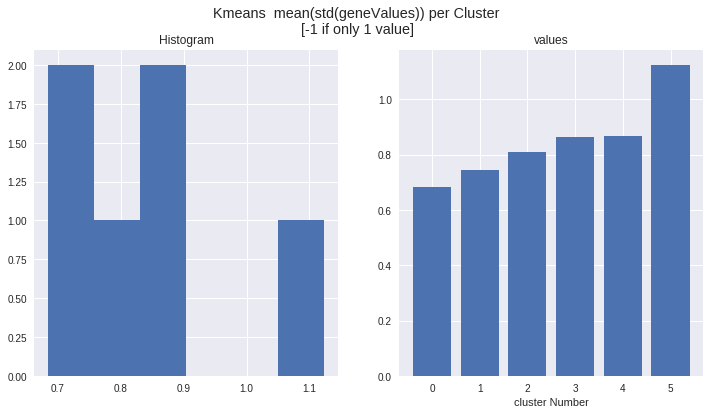

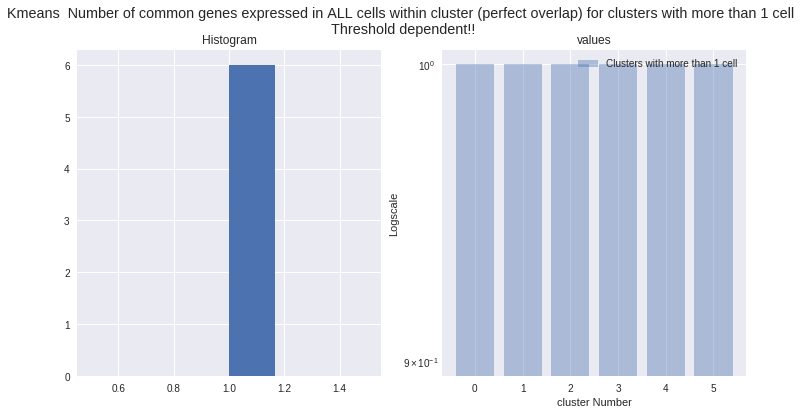

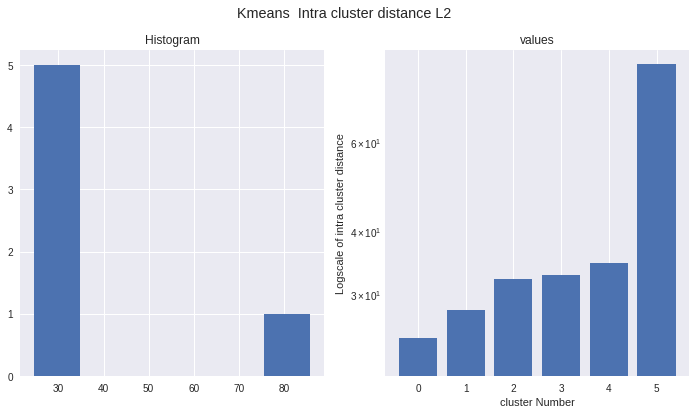

In [19]:
visualizeEvalData(clusterEvalData, 'Kmeans ')